In [17]:
#3.2 Linear Regression Implementation from Scratch

import random
import torch
from d2l import torch as d2l

#3.2.1 Generating the Dataset

def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w))) 
    # torch.normal(means, std, out=None)從mean跟std的離散正態分佈中抽取隨機數
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4]) 
#每個example有2個features(independent variable)
#因此data set會是1000*2的matrix

true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000) #產生1000個examples


In [22]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.7855,  2.4687]) 
label: tensor([-5.7636])


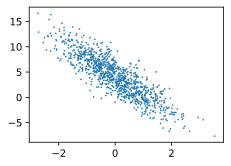

In [25]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 0.5);

In [48]:
#3.2.2 Reading the Dataset

#在data set中隨機抓取一小批example
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices) #把indices的順序打亂

    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        #print(batch_indices)
        yield features[batch_indices], labels[batch_indices]


In [49]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print("minibatch")
    print("X==>\n",X, '\n y==>\n', y)
    break

minibatch
X==>
 tensor([[-0.3645,  0.4576],
        [ 0.5500, -0.3645],
        [ 1.1934, -1.6389],
        [-0.7204,  1.4307],
        [ 0.2916, -0.5440],
        [-0.1501,  1.9991],
        [ 0.1118,  0.5282],
        [ 0.6754, -1.2099],
        [-0.8497,  0.4065],
        [ 0.4350, -0.6160]]) 
 y==>
 tensor([[ 1.9345],
        [ 6.5448],
        [12.1657],
        [-2.1105],
        [ 6.6395],
        [-2.9074],
        [ 2.6370],
        [ 9.6801],
        [ 1.1202],
        [ 7.1702]])


In [56]:
#3.2.3 Initializing Model Parameters

#從mean為0且std為0.01的正態分佈中抽樣隨機數,並將bias設置為0,來初始化權重
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#之後開始更新他們
#每次更新,都需要取loss function相對於參數的梯度

In [57]:
#3.2.4. Defining the Model

def linreg(X, w, b): #linear regression function
    return torch.matmul(X, w) + b

In [58]:
#3.2.5. Defining the Loss Function

def squared_loss(y_hat, y): #squared loss function
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [59]:
#3.2.6 Defining the Optimization Algorithm

def sgd(params, lr, batch_size): #小批量隨機梯度下降
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [60]:
#3.2.7 Training

lr = 0.03 #learning rate
num_epochs = 3 #訓練次數
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037314
epoch 2, loss 0.000133
epoch 3, loss 0.000050


In [61]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0006, -0.0007], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0003], grad_fn=<RsubBackward1>)
